In [9]:
#Regression resampling and regularization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [4]:
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


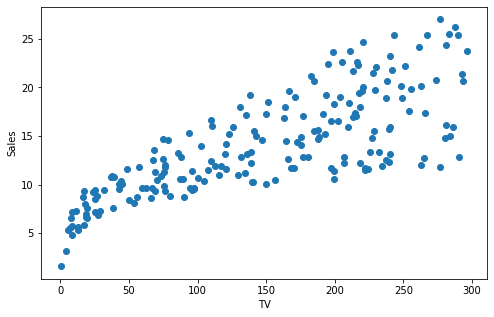

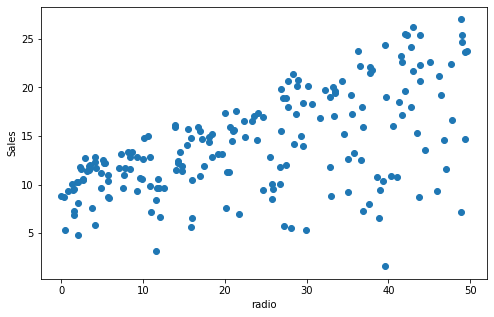

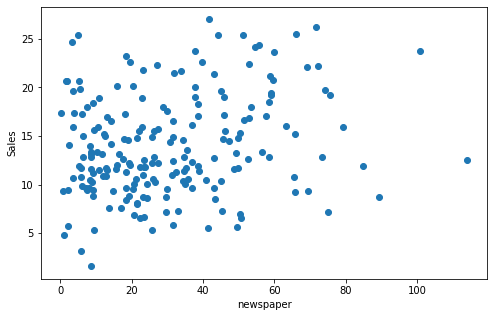

In [7]:
#function to plot the sales against the three features.
def scatter_plot(feature):
    plt.figure(figsize=(8,5))
    plt.scatter(data[feature],data['sales'])
    plt.xlabel(f'{feature}')
    plt.ylabel('Sales')
    plt.show()
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

In [13]:
#checking the correlation of the variables.The correlation matrix.
pearsoncorr = data.corr(method='pearson')

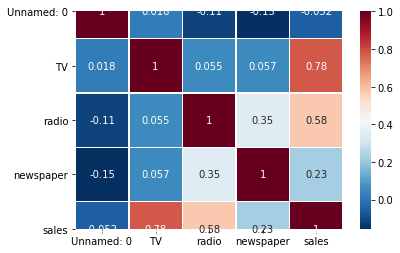

In [10]:
#Representing the correlation matrix in a heatmap
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


In [14]:
#Building the baseline model which is a multiple linear regression model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [16]:
x=data.drop(['sales'],axis=1)
y=data['sales'].values.reshape(-1,1)
linearModel=LinearRegression()
mses=cross_val_score(linearModel,x,y,scoring='neg_mean_squared_error',cv=5)
mean_MSE=np.mean(mses)
print(-mean_MSE)

3.1481607356471946


Regularization
#Ridge regression(L2 regularization)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters={'alpha':[1e-15,1e-14,1e-10,1e-9,1e-5,1e-2,1e-1,1,1.5,2,3,4,5,6]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 6}
3.1480865111392062


Lasso(L1 regularization)

In [22]:
from sklearn.linear_model import Lasso

In [23]:
lasso=Lasso(tol=0.05)
parameters={'alpha':[1e-15,1e-14,1e-10,1e-9,1e-5,1e-2,1e-1,1,1.5,2,3,4,5,6]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 2}
3.0804871791575543


In [ ]:
'''From the above analysis we can conclude that the best regressor is the Lasso regressor with a score of 3.0804871791575543'''